In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 241112


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/workflow_test/foldseek_rice_up_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/workflow_test/rice_up_idmapping.tsv")
water_result_dir_path = pathlib.Path("../test/workflow_test/result_water")
needle_result_dir_path = pathlib.Path("../test/workflow_test/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/workflow_test/HN5_genes_up_rice.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/workflow_test/foldseek_hit_species_togoid_convert.tsv")

In [4]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str
"""Os08g0546800""","""Q6Z9C8""","""A0A024R6X7""",1.0750e-10,1.0,11,20.3,0.203,86,32,390,390,3,372,492,422,0.921,0.752,0.7541,0.249,0.2008,0.2008,34.0,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EAAGVGVGQQQRTVPTPFLTKTYQLVDDPA…","""EAPAALPTEPGPSPVPAFLGKLWALVGDPG…",221,"""0.438,0.500,0.625,0.625,0.636,…"
"""Os03g0293000""","""Q10MW6""","""Q5TDH4""",5.7380e-25,1.0,30,17.9,0.179,111,1,581,582,6,501,655,620,0.998,0.757,0.5954,0.2999,0.2716,0.2716,17.97,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGIPVRSLLVASIVLSSIALHVAAAKNLDP…","""LSISWQFLIVLVLILQILS-----ALDFDP…",346,"""0.857,1.000,0.977,1.000,0.962,…"
"""Os03g0293000""","""Q10MW6""","""Q9Y2G8""",2.0510e-25,1.0,35,18.3,0.183,114,1,582,582,6,502,782,622,1.0,0.636,0.5952,0.2908,0.2283,0.2283,17.95,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGIPVRSLLVASIVLSSIALHVAAAKNLDP…","""LSISWQFLIVLVLILQILS-----ALDFDP…",343,"""0.964,0.906,0.977,1.000,0.962,…"
"""Os03g0293000""","""Q10MW6""","""Q6FIF1""",0.000003,1.0,7,29.6,0.296,64,1,199,582,1,163,223,216,0.342,0.731,0.6791,0.1133,0.2854,0.2854,18.97,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGIPVRSLLVASIVLSSIALHVAAAKNLDP…","""MATP-QSIFIFAICILMITELILASK--SY…",82,"""0.536,0.438,0.636,0.545,0.696,…"
"""Os03g0293000""","""Q10MW6""","""B4DX69""",0.001203,1.0,7,13.1,0.131,29,101,312,582,1,194,197,221,0.364,0.985,0.5806,0.1712,0.474,0.474,27.7,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""FGGGNFGNREGYTYFTGGGAKTSHFSSGDG…","""MYVPPRGSDDRRALDRQGGLGCASLRS--H…",156,"""0.152,0.156,0.198,0.262,0.324,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os03g0745600""","""B7F9F6""","""B4DPG9""",0.0006071,1.0,10,18.0,0.18,43,33,248,249,120,344,348,238,0.867,0.647,0.6718,0.678,0.501,0.501,3.7,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""PQLRWAFVRKVYAILSIQMLLTIAVASVVV…","""PQYVKDRIHSTYMYLAGSIGLTALSAIAIS…",160,"""0.322,0.375,0.417,0.511,0.540,…"
"""Os03g0745600""","""B7F9F6""","""B4DSV8""",0.0008702,1.0,10,18.0,0.18,43,33,248,249,104,328,332,238,0.867,0.678,0.6727,0.6805,0.5244,0.5244,3.654,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""PQLRWAFVRKVYAILSIQMLLTIAVASVVV…","""PQYVKDRIHSTYMYLAGSIGLTALSAIAIS…",160,"""0.322,0.375,0.410,0.494,0.540,…"
"""Os03g0745600""","""B7F9F6""","""F8W1V3""",0.002342,1.0,9,21.8,0.218,45,57,248,249,3,191,200,206,0.771,0.945,0.6197,0.6104,0.7474,0.7474,3.291,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VASVVVFVRPVALFFVSTPAGFALYIFLII…","""VAAAGAYVHMV-------THFIQAGLLSAL…",130,"""0.363,0.301,0.360,0.382,0.312,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

<Figure size 4000x4000 with 0 Axes>

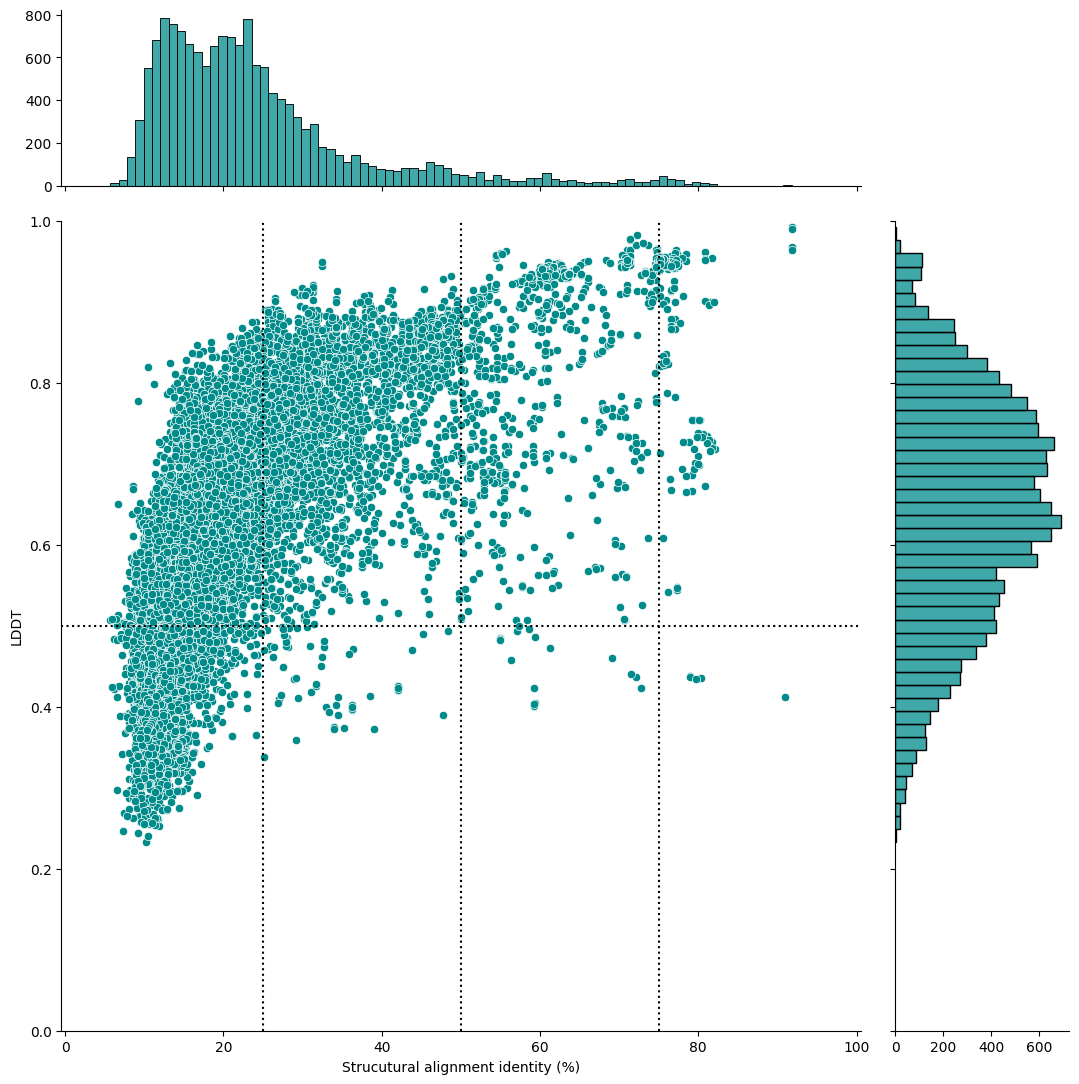

<Figure size 5000x5000 with 0 Axes>

In [5]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_result,
    x="pident", # Strucutural alignment identity (%) 
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)


plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Strucutural alignment identity (%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [6]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [7]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame())

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame())

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KHW2""","""Q5T9P8""",137,"""37/137""",27.0,"""55/137""",40.1,"""44/137""",32.1,95.0
"""A0A0N7KKY0""","""A0A0K0K1J6""",112,"""30/112""",26.8,"""42/112""",37.5,"""30/112""",26.8,73.5
"""A0A0N7KKY0""","""B2R894""",184,"""41/184""",22.3,"""57/184""",31.0,"""80/184""",43.5,68.0
"""A0A0N7KKY0""","""D9IAI1""",156,"""39/156""",25.0,"""56/156""",35.9,"""45/156""",28.8,79.5
"""A0A0N7KKY0""","""P30086""",156,"""39/156""",25.0,"""56/156""",35.9,"""45/156""",28.8,79.5
…,…,…,…,…,…,…,…,…,…
"""Q9XFE4""","""Q9UJX3""",384,"""72/384""",18.8,"""137/384""",35.7,"""107/384""",27.9,92.5
"""Q9XFE4""","""Q9Y680""",198,"""64/198""",32.3,"""92/198""",46.5,"""33/198""",16.7,190.0
"""Q9XFE4""","""Q9Y6J0""",171,"""42/171""",24.6,"""72/171""",42.1,"""34/171""",19.9,76.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A0N7KHW2""","""Q5T9P8""",350,"""48/350""",13.7,"""74/350""",21.1,"""215/350""",61.4,75.0
"""A0A0N7KKY0""","""A0A0K0K1J6""",209,"""35/209""",16.7,"""51/209""",24.4,"""111/209""",53.1,59.5
"""A0A0N7KKY0""","""B2R894""",379,"""46/379""",12.1,"""66/379""",17.4,"""245/379""",64.6,48.0
"""A0A0N7KKY0""","""D9IAI1""",230,"""43/230""",18.7,"""61/230""",26.5,"""106/230""",46.1,65.5
"""A0A0N7KKY0""","""P30086""",230,"""43/230""",18.7,"""61/230""",26.5,"""106/230""",46.1,65.5
…,…,…,…,…,…,…,…,…,…
"""Q9XFE4""","""Q9UJX3""",781,"""92/781""",11.8,"""174/781""",22.3,"""412/781""",52.8,76.5
"""Q9XFE4""","""Q9Y680""",623,"""68/623""",10.9,"""97/623""",15.6,"""439/623""",70.5,170.0
"""Q9XFE4""","""Q9Y6J0""",2612,"""58/2612""",2.2,"""93/2612""",3.6,"""2419/2612""",92.6,60.5


In [8]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A0N7KHW2""","""Q5T9P8""",137,350,"""37/137""","""48/350""",27.0,13.7,40.1,21.1,"""44/137""","""215/350""",32.1,61.4,95.0,75.0
"""A0A0N7KKY0""","""A0A0K0K1J6""",112,209,"""30/112""","""35/209""",26.8,16.7,37.5,24.4,"""30/112""","""111/209""",26.8,53.1,73.5,59.5
"""A0A0N7KKY0""","""B2R894""",184,379,"""41/184""","""46/379""",22.3,12.1,31.0,17.4,"""80/184""","""245/379""",43.5,64.6,68.0,48.0
"""A0A0N7KKY0""","""D9IAI1""",156,230,"""39/156""","""43/230""",25.0,18.7,35.9,26.5,"""45/156""","""106/230""",28.8,46.1,79.5,65.5
"""A0A0N7KKY0""","""P30086""",156,230,"""39/156""","""43/230""",25.0,18.7,35.9,26.5,"""45/156""","""106/230""",28.8,46.1,79.5,65.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Q9XFE4""","""Q9UJX3""",384,781,"""72/384""","""92/781""",18.8,11.8,35.7,22.3,"""107/384""","""412/781""",27.9,52.8,92.5,76.5
"""Q9XFE4""","""Q9Y680""",198,623,"""64/198""","""68/623""",32.3,10.9,46.5,15.6,"""33/198""","""439/623""",16.7,70.5,190.0,170.0
"""Q9XFE4""","""Q9Y6J0""",171,2612,"""42/171""","""58/2612""",24.6,2.2,42.1,3.6,"""34/171""","""2419/2612""",19.9,92.6,76.5,60.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [9]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"]).n_unique())
display(join_foldseek.head())

shape: (14_035, 44)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ Q10PW8      ┆ E9PS65     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ Q10NA1      ┆ B4E354     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ A3BKY1      ┆ A0A384NQ03 ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ E5D3K0      ┆ A0A6Q8PFK8 ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os02g0644100""","""Q6H660""","""A0A7I2V4T9""",0.000008,1.0,5,27.0,0.27,57,2,209,578,91,272,276,211,0.36,0.659,0.732,0.2049,0.4239,0.4239,20.28,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ADEAKAKGNAAFSAGRYEEAARHFTDAIAL…","""AERLKTEGNEQMKVENFEAAVHFYGKAIEL…",122,"""0.836,0.890,0.919,0.942,0.924,…",217,669,"""63/217""","""64/669""",29.0,9.6,43.8,14.5,"""42/217""","""484/669""",19.4,72.3,227.5,223.5
"""Os06g0716700""","""A0A0P0X159""","""Q5CAQ4""",8.7130e-18,1.0,7,25.0,0.25,73,207,494,498,2,230,495,291,0.578,0.463,0.6174,0.4164,0.4188,0.4188,6.628,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""VADYVEVI--SKHNDDKQHVWESKADGSFA…","""VADRVEVYSRSAAPGSLGYQWLSDGSGVFE…",153,"""0.411,0.447,0.574,0.599,0.530,…",291,764,"""79/291""","""76/764""",27.1,9.9,50.2,19.2,"""73/291""","""535/764""",25.1,70.0,339.0,331.5
"""Os02g0644100""","""Q0DZ61""","""B7Z7L8""",8.6970e-8,1.0,14,12.4,0.124,72,1,575,578,39,438,522,578,0.995,0.766,0.6343,0.1879,0.2073,0.2073,22.66,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MADEAKAKGNAAFSAGRYEEAARHFTDAIA…","""ILEKQNWLIHLHYIRKDYEACKAVIKEQLQ…",325,"""0.413,0.414,0.603,0.556,0.603,…",146,878,"""38/146""","""61/878""",26.0,6.9,40.4,11.5,"""13/146""","""656/878""",8.9,74.7,124.0,98.5
"""Os05g0460000""","""B9FJH8""","""B3KXH0""",1.4540e-42,1.0,23,20.8,0.208,168,5,616,646,30,804,991,810,0.947,0.782,0.7213,0.7862,0.5216,0.5216,7.434,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EGP--AIGIDLGTTYSCVGVWQHDRVEIIA…","""SDTLAVMSVDLGSESM--------KVAIVL…",409,"""0.207,0.232,0.311,0.613,0.614,…",606,1044,"""176/606""","""203/1044""",29.0,19.4,48.3,31.8,"""89/606""","""451/1044""",14.7,43.2,617.0,605.0
"""Os06g0716700""","""A0A0P0X0X9""","""O75322""",1.5380e-53,1.0,9,40.3,0.403,222,79,607,612,22,537,539,550,0.864,0.957,0.846,0.6967,0.788,0.788,9.183,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""NFPIYLWATKEVDVEVPAD-----------…","""LYFLYWSYFKERDKEVSDDEAEEKEDKEEE…",273,"""0.411,0.500,0.536,0.459,0.453,…",549,661,"""235/549""","""239/661""",42.8,36.2,60.3,50.5,"""53/549""","""171/661""",9.7,25.9,1106.0,1094.5


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (sequence alignment info vs LDDT)

<Figure size 4000x4000 with 0 Axes>

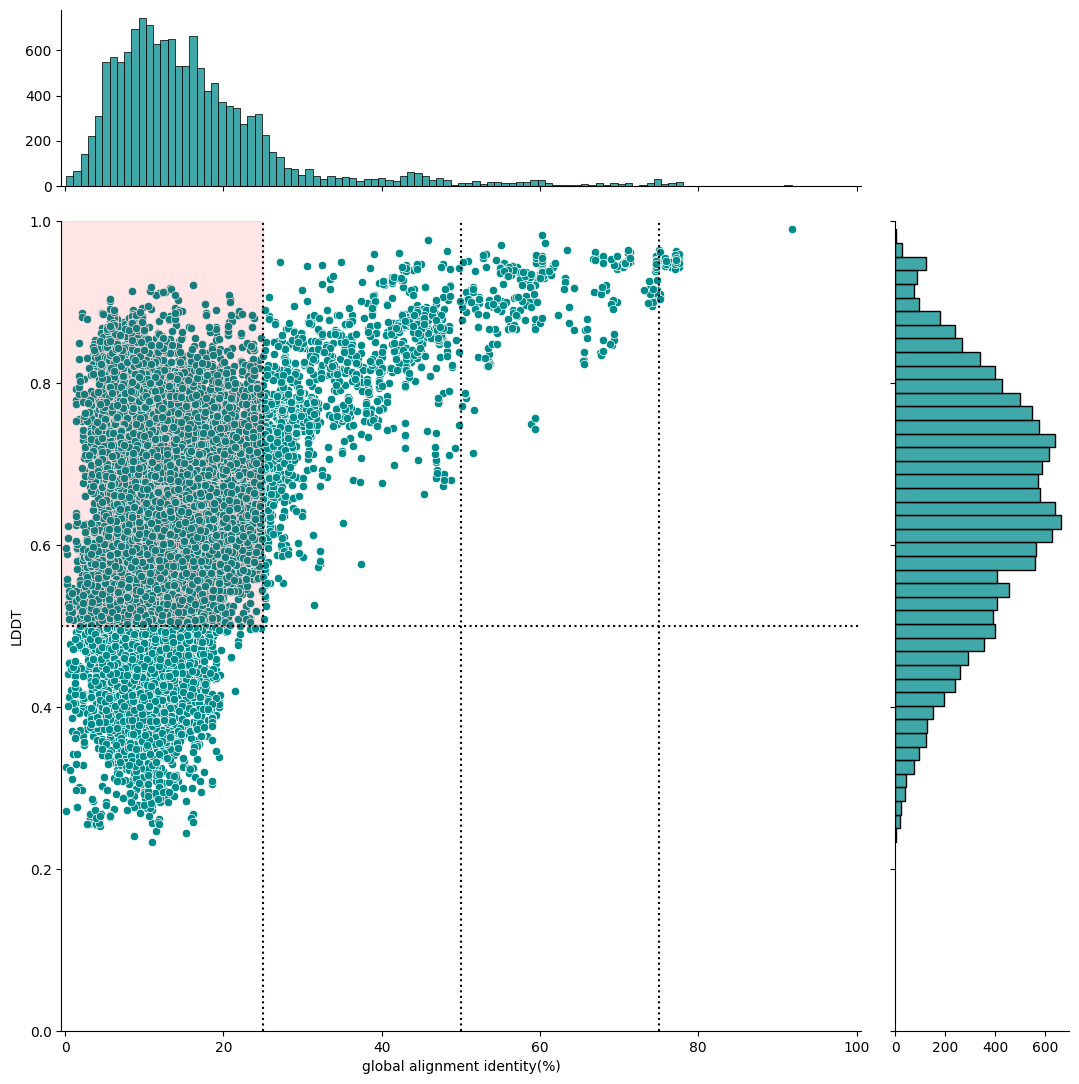

<Figure size 5000x5000 with 0 Axes>

In [10]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=join_foldseek,
    x="Identity_percent_needle", # You can also use Identity_percent_water, Similarity_percent_needle, Similarity_percent_water
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
plt.fill_betweenx(
    y=[0.5, 1],
    x1=-0.5,
    x2=25,
    color="red",
    alpha=0.1
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("global alignment identity(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;

&nbsp;


# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- Select the ones that have foldseek hit

In [11]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From").agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Os12g0600100""",686,false
"""Os08g0442200""",516,false
"""Os01g0699400""",498,false
"""Os02g0644100""",483,false
"""Os07g0633200""",475,false
…,…,…
"""Os01g0224200""",0,true
"""Os02g0286933""",0,true
"""Os08g0442900""",0,true


### Filter out the ones that have no foldseek hit

In [12]:
no_hit_genes_list = hit_count.filter(
    pl.col("foldseek no hit") == True
)

idmapping_list = pl.read_csv(
    query_uniprot_idmapping_tsv,
    separator='\t'
)
  
no_hit_idmapping_list = no_hit_genes_list.join(
    idmapping_list,
    on="From",
    how="left"
).sort(
    by=["From"],
    descending=[False]
)

print(no_hit_idmapping_list.group_by(["From"]).n_unique())
display(no_hit_idmapping_list.head())

shape: (210, 4)
┌──────────────┬─────────────────────────────────┬─────────────────┬───────────────────┐
│ From         ┆ target hit count (gene level v… ┆ foldseek no hit ┆ UniProt Accession │
│ ---          ┆ ---                             ┆ ---             ┆ ---               │
│ str          ┆ u32                             ┆ u32             ┆ u32               │
╞══════════════╪═════════════════════════════════╪═════════════════╪═══════════════════╡
│ Os12g0147200 ┆ 1                               ┆ 1               ┆ 2                 │
│ Os08g0518800 ┆ 1                               ┆ 1               ┆ 2                 │
│ Os12g0440300 ┆ 1                               ┆ 1               ┆ 1                 │
│ Os02g0622500 ┆ 1                               ┆ 1               ┆ 1                 │
│ Os01g0944100 ┆ 1                               ┆ 1               ┆ 3                 │
│ …            ┆ …                               ┆ …               ┆ …                 │
│ Os0

From,target hit count (gene level vs uniprot accession),foldseek no hit,UniProt Accession
str,u32,bool,str
"""Os01g0124000""",0,true,"""Q5ZCB1"""
"""Os01g0124000""",0,true,"""Q5ZD53"""
"""Os01g0124100""",0,true,"""A0A0P0UYB2"""
"""Os01g0124100""",0,true,"""Q0JR27"""
"""Os01g0124401""",0,true,"""Q0JR25"""


&nbsp;

&nbsp;

## Filtering Condition2

In [13]:
condition2 = join_foldseek.sort(
        "qcov", descending=True
    ).unique(
        subset=["From", "foldseek hit"]
    ).sort(
        "qcov", descending=True
    )

print(condition2.group_by(["From"]).n_unique())
display(condition2)

shape: (157, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os05g04983 ┆ 1          ┆ 90        ┆ 82     ┆ … ┆ 57        ┆ 72        ┆ 63        ┆ 72        │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os07g06383 ┆ 2          ┆ 51        ┆ 46     ┆ … ┆ 37        ┆ 41       

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os03g0266900""","""P31673""","""A0A140G961""",0.000005,1.0,5,25.9,0.259,41,1,154,154,8,156,168,158,1.0,0.887,0.6809,0.5155,0.4753,0.4753,16.58,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MSMIRRSNVFDPFSLDLWDPFDGFPFGSGS…","""FPFHSPSRLFDQFFGEHLLESDLFPTSTSL…",104,"""0.850,0.750,0.639,0.969,0.577,…",162,185,"""48/162""","""50/185""",29.6,27.0,46.9,42.7,"""40/162""","""48/185""",24.7,25.9,118.5,113.0
"""Os06g0593100""","""Q69XD4""","""Q8TBE7""",0.000003,1.0,17,11.9,0.119,50,1,358,358,23,405,412,419,1.0,0.93,0.5379,0.5818,0.517,0.517,10.02,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MVTARKGRGGRGPPRPRVVDGGGGSM----…","""MVKYTSHYPQPGDDGYEEINEGYGNFMEEN…",272,"""1.000,1.000,1.000,0.938,0.833,…",316,516,"""58/316""","""65/516""",18.4,12.6,34.5,23.4,"""85/316""","""262/516""",26.9,50.8,100.0,86.0
"""Os03g0277300""","""Q10NA1""","""B4DI54""",3.1670e-96,1.0,4,75.6,0.756,494,1,653,653,65,705,705,653,1.0,0.909,0.9524,0.9461,0.8769,0.8769,3.372,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MAGNKGEGPAIGIDLGTTYSCVGVWQHDRV…","""MA--TAKGIAIGIDLGTTYSCVGVFQHGKV…",147,"""0.533,0.500,0.635,0.426,0.561,…",650,720,"""494/650""","""497/720""",76.0,69.0,85.7,77.6,"""16/650""","""82/720""",2.5,11.4,2520.0,2518.5
"""Os03g0267200""","""E5D3J9""","""B4DL87""",7.9130e-7,1.0,7,22.2,0.222,38,1,159,159,1,158,170,171,1.0,0.929,0.6246,0.4881,0.4583,0.4583,26.49,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MSLIRRGNAFDPFSLDLWDPVDGFPFGSGG…","""MTERRV-----PFSLLRGPSWPGYVRPLPP…",108,"""0.812,0.583,0.708,0.425,0.235,…",94,191,"""28/94""","""39/191""",29.8,20.4,50.0,37.7,"""18/94""","""53/191""",19.1,27.7,96.0,80.5
"""Os03g0277300""","""Q10NA1""","""P34931""",1.4900e-97,1.0,4,75.9,0.759,496,1,653,653,1,641,641,653,1.0,1.0,0.9498,0.9476,0.9652,0.9652,3.481,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MAGNKGEGPAIGIDLGTTYSCVGVWQHDRV…","""MATAK--GIAIGIDLGTTYSCVGVFQHGKV…",145,"""0.250,0.357,0.241,0.385,0.548,…",650,656,"""495/650""","""498/656""",76.2,75.9,85.7,85.2,"""16/650""","""18/656""",2.5,2.7,2525.0,2523.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os05g0498300""","""Q6L4V0""","""A0A494C0L0""",0.00913,1.0,3,27.3,0.273,26,5,91,809,37,129,131,95,0.108,0.71,0.4151,0.0918,0.5009,0.5009,4.981,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""EEEEMSEREVDSQVHMACVMQGRRVGIAYY…","""EEEEVEEEEELAEIHLCVLWNSGYLGIAYY…",59,"""0.161,0.141,0.147,0.207,0.202,…",75,846,"""25/75""","""29/846""",33.3,3.4,52.0,5.6,"""1/75""","""752/846""",1.3,88.9,104.0,92.0
"""Os02g0115900""","""Q6Z7B0""","""B4DZP3""",0.01372,1.0,0,47.8,0.478,34,138,208,665,3,73,89,71,0.107,0.798,0.3896,0.1053,0.7504,0.7504,1.214,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""DGENKVFSPEEVSAMILGKMKETAEAYLGK…","""MGEEHLFSVEQITAMLLTKLKETAENSLKK…",37,"""0.175,0.208,0.250,0.234,0.244,…",70,669,"""34/70""","""36/669""",48.6,5.4,72.9,8.5,"""0/70""","""584/669""",0.0,87.3,180.0,166.5
"""Os08g0500700""","""A0A0P0XIF8""","""Q58FF5""",0.02471,1.0,0,45.8,0.458,33,594,665,694,2,73,74,72,0.104,0.973,0.5606,0.1018,0.8888,0.8888,1.438,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GYMSSKKTMEINPENAIMEELRKRADADKN…","""GYMMAKKHLEINLDQPIVETLQQKAEVDKD…",39,"""0.100,0.167,0.194,0.234,0.250,…",64,695,"""33/64""","""34/695""",51.6,4.9,76.6,7

&nbsp;

&nbsp;

## Filtering Condition3

- select the ones with qcov (query coverage) >= 0.5 and tcov (target coverage) >= 0.5

In [14]:
condition3 = condition2.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).unique()

condition3_rm = condition2.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition3.group_by(["From"]).n_unique())
display(condition3)

shape: (151, 44)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Os05g03670 ┆ 1          ┆ 1         ┆ 1      ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Os09g04917 ┆ 2          ┆ 106       ┆ 105    ┆ … ┆ 60        ┆ 69       

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Os01g0524700""","""Q5QL78""","""A0A2R8Y804""",5.9870e-10,1.0,30,13.4,0.134,91,87,732,848,150,679,702,677,0.762,0.755,0.5794,0.4602,0.5448,0.5448,9.228,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SAYIGLFVRMLGLDNDPRDREHAVYTIWQY…","""TRAIPELTKLL-NDEDQVVVNKAAVMVHQL…",408,"""0.595,0.608,0.723,0.625,0.528,…",883,937,"""168/883""","""171/937""",19.0,18.2,35.6,34.0,"""273/883""","""324/937""",30.9,34.6,175.0,170.5
"""Os07g0549800""","""Q84ZB9""","""Q14011""",2.5130e-10,1.0,1,31.0,0.31,32,30,132,133,2,103,172,103,0.774,0.593,0.8065,0.5918,0.4609,0.4609,6.56,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LADPCNNLFVSGLNKRTTSDGLREAFSKFG…","""ASDE-GKLFVGGLSFDTNEQSLEQVFSKYG…",70,"""0.169,0.243,0.395,0.457,0.810,…",82,209,"""32/82""","""34/209""",39.0,16.3,58.5,25.4,"""0/82""","""113/209""",0.0,54.1,153.0,149.5
"""Os01g0757500""","""Q5JLZ9""","""H7C1Q7""",0.000009,1.0,7,12.5,0.125,19,82,226,226,8,138,156,151,0.642,0.84,0.6953,0.3628,0.5187,0.5187,14.26,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""FSWDQDAEKIKIYVFLEGVEQDKVETTFKP…","""TLWYDRPRYVFMEFCVEDSTD--VHVLIED…",106,"""0.767,0.833,0.906,0.863,0.842,…",109,271,"""23/109""","""37/271""",21.1,13.7,36.7,21.8,"""40/109""","""160/271""",36.7,59.0,42.0,25.5
"""Os07g0633200""","""Q7XI49""","""O43251""",2.7160e-9,1.0,6,21.8,0.218,50,1,213,213,78,294,390,229,1.0,0.556,0.7356,0.3684,0.2066,0.2066,27.72,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MGRGYSYSPSPPPRSYRRRASSPI------…","""HGEQSSNSPSTQNGSLTTEGGAQTDGQQSQ…",151,"""0.938,0.800,0.958,0.821,0.750,…",78,393,"""28/78""","""60/393""",35.9,15.3,55.1,24.2,"""2/78""","""183/393""",2.6,46.6,114.5,103.5
"""Os02g0115900""","""A0A0P0VDX8""","""E5RIL9""",0.08115,0.978,14,10.0,0.1,28,2,277,445,37,197,203,280,0.62,0.793,0.4225,0.2114,0.4086,0.4086,15.84,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""KNILVFDLGGGTFDVSILTIDNGVFEVLAT…","""KIVLGIETSCDDTAAAVVD-ETG--NVLGE…",129,"""0.730,0.745,0.708,0.689,0.651,…",144,482,"""31/144""","""45/482""",21.5,9.3,36.1,16.6,"""41/144""","""316/482""",28.5,65.6,48.0,27.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os05g0156500""","""B9FHF3""","""P59910""",1.6800e-26,1.0,10,30.5,0.305,107,23,347,347,2,316,316,350,0.937,0.997,0.7491,0.4644,0.5079,0.5079,21.84,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""GKSYYDVLQVPKGASEDQIKRSYRKLALKY…","""GQDYYSVLGITRNSEDAQIKQAYRRLALKH…",183,"""0.430,0.486,0.842,0.939,0.906,…",365,389,"""105/365""","""106/389""",28.8,27.2,47.1,45.0,"""93/365""","""115/389""",25.5,29.6,417.0,415.0
"""Os05g0223200""","""A0A0P0WJD1""","""A0A023T787""",1.1650e-7,1.0,3,24.5,0.245,28,1,104,104,50,163,174,114,1.0,0.655,0.7282,0.6844,0.4197,0.4197,13.48,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""MSAPWWDNDYNGRTGSDSKGQES-RVYVGN…","""MREDYDSVEQDGDEPGPQRSVEGWILFVTG…",76,"""1.000,0.833,0.750,0.812,0.833,…",107,174,"""30/107""","""31/174""",28.0,17.8,48.6,30.5,"""11/107""","""70/174""",10.3,40.2,124.5,117.5
"""Os04g0561500""","""Q7XSQ2""","""A7E2E4""",8.3800e-20,1.0,52,12.7,0.127,100,88,731,739,83,782,801,786,0.871,0.874,0.4209,0.584,0.5447,0.5447,6.811,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""RAPFKRAGSYFYLHNPGLQPHSALYVQH--…","""EAKWISDTEFIYREQKG-----TVRLWNVE…",458,"""0.406,0.452,0.458,0.538,0.548,…",817,

&nbsp;

&nbsp;


## Filtering Condition4

- select the ones that can be converted to HGNC Gene symbol through Ensembl ID by TogoID
- Article: [TogoID: an exploratory ID converter to bridge biological dataset](https://doi.org/10.1093/bioinformatics/btac491)

In [15]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null()
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A024QZW4""","""ENSP00000518269""","""ENST00000710437""","""ENSG00000124786""",21601,"""SLC35B3"""
"""A0A024QZW4""","""ENSP00000498054""","""ENST00000648987""","""ENSG00000124786""",21601,"""SLC35B3"""
"""A0A024R3B9""","""ENSP00000435411""","""ENST00000525823""","""ENSG00000109846""",2389,"""CRYAB"""
"""A0A024R3B9""","""ENSP00000435960""","""ENST00000528961""","""ENSG00000109846""",2389,"""CRYAB"""
"""A0A024R3B9""","""ENSP00000435046""","""ENST00000533280""","""ENSG00000109846""",2389,"""CRYAB"""
…,…,…,…,…,…
"""X6RA14""","""ENSP00000367969""","""ENST00000378697""","""ENSG00000139684""",3465,"""ESD"""
"""X6RBJ8""","""ENSP00000380187""","""ENST00000396990""","""ENSG00000198876""",19911,"""DCAF12"""
"""X6RHX1""","""ENSP00000407993""","""ENST00000423670""","""ENSG00000000457""",19285,"""SCYL3"""


In [16]:
condition4 = condition3.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).filter(
    pl.col("ensembl_gene_id").is_not_null()
).group_by(
    pl.exclude(
        [
            "hgnc_id", "hgnc_symbol_id", "ensembl_gene_id", "ensembl_protein_id", "ensembl_transcript_id"
        ]
    )
).agg(
    pl.col("hgnc_id"),
    pl.col("hgnc_symbol_id"),
    pl.col("ensembl_gene_id"),
    pl.col("ensembl_protein_id"),
    pl.col("ensembl_transcript_id"),
).drop(
    [
        "hgnc_id",
        "ensembl_transcript_id"
    ]
).sort(
    by=["From"],
    descending=[False]
)

display(condition4)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,taxid,taxname,taxlineage,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle,hgnc_symbol_id,ensembl_gene_id,ensembl_protein_id
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,str,str,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64,list[str],list[str],list[str]
"""Os01g0105800""","""Q657Z2""","""Q5TBE9""",0.000019,1.0,1,42.8,0.428,36,4,86,138,2,85,86,84,0.601,0.977,0.6491,0.4395,0.6864,0.6864,11.51,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SAALALALRRATSSAHKQKQKQALALTDAA…","""SASLVRATVRAVSKRKLQPTRAALTLTPSA…",47,"""0.393,0.594,0.688,0.750,0.844,…",81,141,"""37/81""","""37/141""",45.7,26.2,63.0,36.2,"""6/81""","""58/141""",7.4,41.1,154.5,153.5,"[""ISCA1""]","[""ENSG00000135070""]","[""ENSP00000365157""]"
"""Os01g0105800""","""Q657Z2""","""Q86U28""",2.6130e-8,1.0,3,29.8,0.298,37,4,125,138,27,147,154,124,0.884,0.786,0.7242,0.6192,0.5619,0.5619,8.441,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SAALALALRRATSSAHKQKQKQALALTDAA…","""TASLGPQARREASSSSPEAGEGQIRLTDSC…",82,"""0.571,0.625,0.656,0.861,0.906,…",126,162,"""39/126""","""39/162""",31.0,24.1,50.8,39.5,"""3/126""","""32/162""",2.4,19.8,164.5,154.5,"[""ISCA2"", ""ISCA2""]","[""ENSG00000165898"", ""ENSG00000165898""]","[""ENSP00000450523"", ""ENSP00000452007""]"
"""Os01g0105800""","""Q657Z2""","""A0A1B0GTK6""",2.9110e-9,1.0,1,48.3,0.483,43,27,114,138,4,92,92,89,0.638,0.967,0.841,0.6203,0.9193,0.9193,0.88,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""LALTDAAASRIRQLLSLRH-RPYLRLGVKA…","""FVTTPSAVNKIKQLLKDKPEHVGVKVGVRT…",45,"""0.655,0.788,0.779,0.859,0.962,…",87,141,"""44/87""","""44/141""",50.6,31.2,70.1,43.3,"""5/87""","""52/141""",5.7,36.9,211.5,206.5,"[""ISCA1""]","[""ENSG00000135070""]","[""ENSP00000489740""]"
"""Os01g0105800""","""Q657Z2""","""Q9BUE6""",9.1120e-13,1.0,1,51.6,0.516,64,4,126,138,2,125,129,124,0.891,0.961,0.8839,0.7278,0.7768,0.7768,11.57,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SAALALALRRATSSAHKQKQKQALALTDAA…","""SASLVRATVRAVSKRKLQPTRAALTLTPSA…",59,"""0.393,0.531,0.688,0.722,0.750,…",128,141,"""67/128""","""67/141""",52.3,47.5,67.2,61.0,"""5/128""","""15/141""",3.9,10.6,316.5,312.5,"[""ISCA1""]","[""ENSG00000135070""]","[""ENSP00000365159""]"
"""Os01g0135800""","""Q943Q3""","""P04792""",0.000032,1.0,8,22.7,0.227,36,2,150,150,50,185,205,158,0.993,0.663,0.6507,0.4984,0.3694,0.3694,15.31,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""SLVRSGNVLDPMSVDFWADADPFGA-VRSL…","""SWPGYVRPLPPAAIE--SPAVAAPAYSRAL…",91,"""0.500,0.438,0.500,0.389,0.207,…",156,237,"""38/156""","""40/237""",24.4,16.9,40.4,27.4,"""45/156""","""119/237""",28.8,50.2,91.0,82.0,"[""HSPB1""]","[""ENSG00000106211""]","[""ENSP00000248553""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Os12g0600100""","""Q0IM43""","""J3QRN1""",1.6800e-8,1.0,9,26.3,0.263,71,9,263,387,53,298,323,269,0.659,0.762,0.7072,0.5163,0.6146,0.6146,9.673,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ALQAAQDGNLRLLRKMAKKLDLRGVKDKNG…","""LHHAALGGSLELIALLLEAQATVDIKDSNG…",161,"""0.677,0.763,0.787,0.755,0.782,…",194,457,"""56/194""","""79/457""",28.9,17.3,42.8,27.8,"""42/194""","""204/457""",21.6,44.6,209.5,189.5,"[""CASKIN2""]","[""ENSG00000177303""]","[""ENSP00000464300""]"
"""Os12g0600100""","""Q2QML3""","""X6R9L0""",0.019,1.0,21,11.4,0.114,46,9,386,387,36,339,453,401,0.977,0.671,0.4709,0.2887,0.2481,0.2481,22.15,9606,"""Homo sapiens""","""-_cellular organisms;d_Eukaryo…","""ALQAAQDGNLRLLRKMAKKLDLRGVKDKNG…","""DVEKHLELGKKLLA--AGQ------

In [17]:
hit_count_condition4 = condition4.group_by(
    ["From"]
).agg(
    (pl.col("foldseek hit").count().alias("hit count (gene level)"))
).sort(
    by=["hit count (gene level)"],
    descending=True
)

display(hit_count_condition4)

From,hit count (gene level)
str,u32
"""Os07g0633200""",94
"""Os05g0200500""",93
"""Os01g0699400""",88
"""Os06g0697200""",86
"""Os04g0185600""",84
…,…
"""Os08g0546400""",1
"""Os05g0494600""",1
"""Os06g0592500""",1


In [18]:
foldseek_filter_viz = condition4.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"]).n_unique())
display(foldseek_filter_viz)

shape: (2_945, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Os03g02669 ┆ P31673     ┆ Q8N241     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 00         ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Os04g01856 ┆ Q7X7V2     ┆ A0A3B3IU67 ┆ 1    ┆ … ┆ 1          ┆ 1      

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Os01g0105800""","""Q657Z2""","""A0A1B0GTK6""",0.638,0.967,0.88,0.841,31.2,50.6,43.3,70.1
"""Os01g0105800""","""Q657Z2""","""Q9BUE6""",0.891,0.961,11.57,0.8839,47.5,52.3,61.0,67.2
"""Os01g0105800""","""Q657Z2""","""Q86U28""",0.884,0.786,8.441,0.7242,24.1,31.0,39.5,50.8
"""Os01g0105800""","""Q657Z2""","""Q5TBE9""",0.601,0.977,11.51,0.6491,26.2,45.7,36.2,63.0
"""Os01g0135800""","""Q943Q3""","""Q9UJY1""",1.0,0.832,25.2,0.5183,19.2,25.3,29.5,38.9
…,…,…,…,…,…,…,…,…,…,…
"""Os12g0600100""","""Q0IM43""","""A0A0G2JQ08""",0.664,0.633,12.23,0.6896,13.4,28.9,22.6,50.0
"""Os12g0600100""","""Q2QML3""","""A0A6I8PIK4""",0.997,0.721,24.92,0.5028,6.2,25.5,9.6,40.3
"""Os12g0600100""","""Q0IM43""","""A0A0D9SFE8""",0.649,0.625,8.289,0.6943,12.0,31.0,20.9,49.5


<Figure size 4000x4000 with 0 Axes>

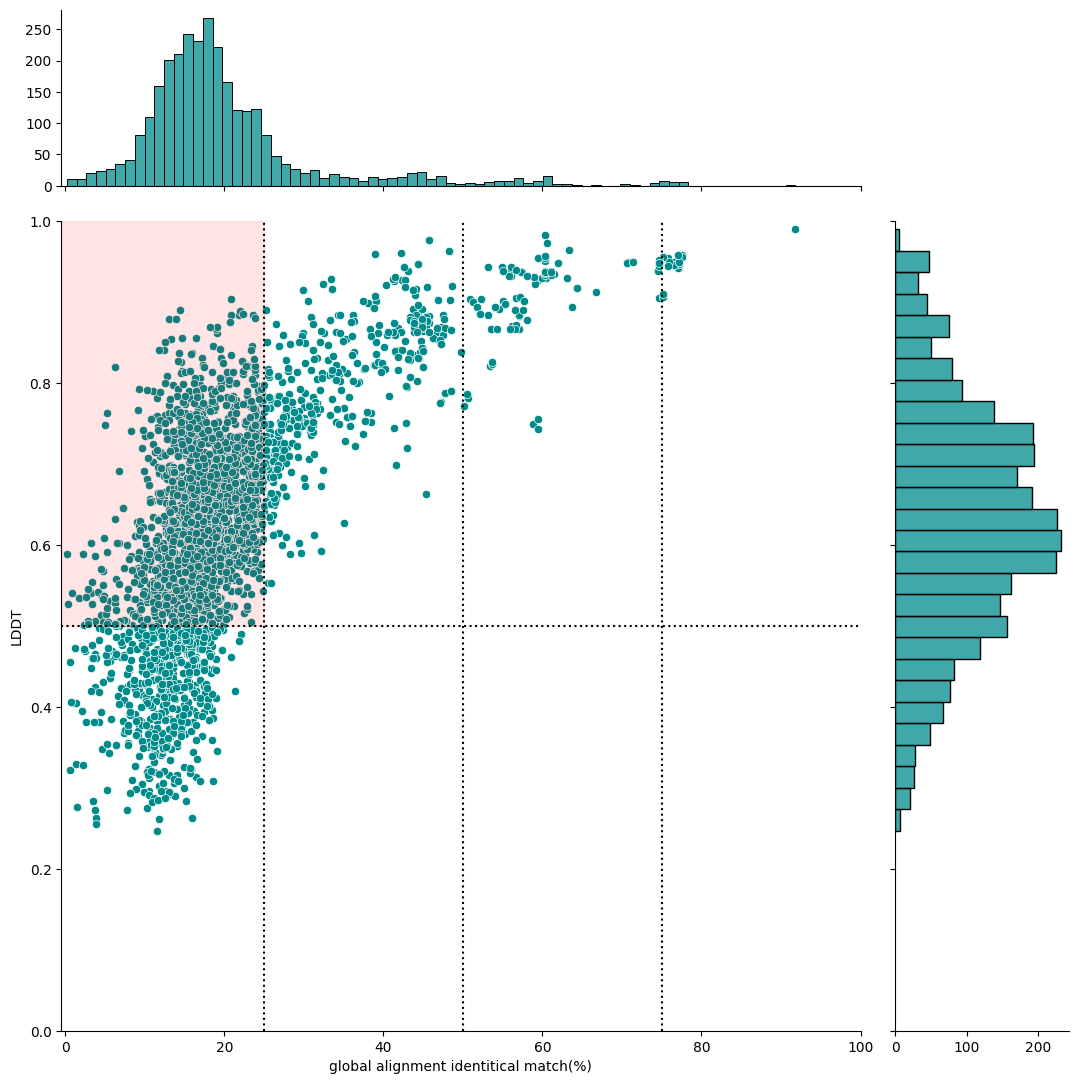

<Figure size 5000x5000 with 0 Axes>

In [19]:
plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz,
    x="Identity_percent_needle",
    y="lddt",
    color="darkcyan",
    height=11,
    ratio=4,
    marginal_ticks=True
)

# highlight the region of interest
plt.fill_betweenx(
    y=[0.5, 1],
    x1=-0.5,
    x2=25,
    color="red",
    alpha=0.1
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("global alignment identitical match(%)")
plt.ylabel("LDDT")
plt.axvline(x=25, color="black", linestyle=":")
plt.axvline(x=50, color="black", linestyle=":")
plt.axvline(x=75, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")
plt.figure(figsize=(10, 10), dpi=500)
plt.show()

&nbsp;

&nbsp;
